# Bonus prvý dataset
## Autori: Matej Delinčák (50%), Martin Pirkovský (50%)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. krok: prieskumná analýza (max 5 bodov)

In [2]:
%run "pipelineBonus.py"

In [18]:
df_orig = pd.concat([load_dataset("data/DataAotizhongxin.csv"), 
                             load_dataset("data/DataDingling.csv"),
                             load_dataset("data/DataDongsi.csv"),
                             load_dataset("data/DataGuanyuan.csv"),
                             load_dataset("data/DataGucheng.csv"),
                             load_dataset("data/DataHuairou.csv"),
                             load_dataset("data/DataChangping.csv"),
                             load_dataset("data/DataNongzhanguan.csv"),
                             load_dataset("data/DataShunyi.csv"),
                             load_dataset("data/DataTiantan.csv"),
                             load_dataset("data/DataWanliu.csv"),
                             load_dataset("data/DataWanshouxigong.csv")])
df_orig

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


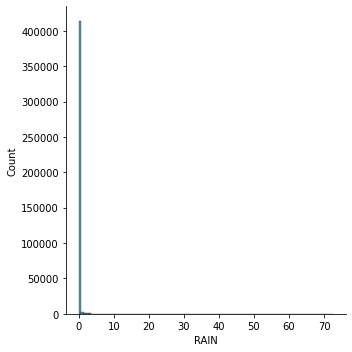

In [4]:

sns.displot(df_orig['RAIN'],bins=100)

In [5]:
df_orig.drop('RAIN', axis=1, inplace=True)

Odstránenie stĺpca RAIN, pretože jeho hodnota je vo väčšine 0.0, ako to môžeme vidieť na grafe.

In [6]:
feature_cols = ['year', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'wd', 'WSPM', 'station']
output_cols = ['PM2.5']#, 'PM10', 'SO2', 'NO2', 'CO', 'O3']
categorical_cols = ['wd', 'station']
numerical_cols = ['year', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for_scaling_cols = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

Rozdelili sme si atribúty na feature, output, numerické a kategorické a atribúty potrebné pre škálovanie.

In [13]:
outlier = CustomOutlierTransformer(df_orig.columns, numerical_cols, "drop")
nulls = CustomNullValuesTransformer(df_orig.columns, "drop")

my_pipeline = make_pipeline(nulls, outlier)
df = my_pipeline.fit_transform(df_orig)

C:\Users\mpirk\AppData\Local\Temp/ipykernel_16556/4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'NO2'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'PRES'}>],
       [<AxesSubplot:title={'center':'DEWP'}>,
        <AxesSubplot:title={'center':'RAIN'}>,
        <AxesSubplot:title={'center':'WSPM'}>, <AxesSubplot:>]],
      dtype=object)

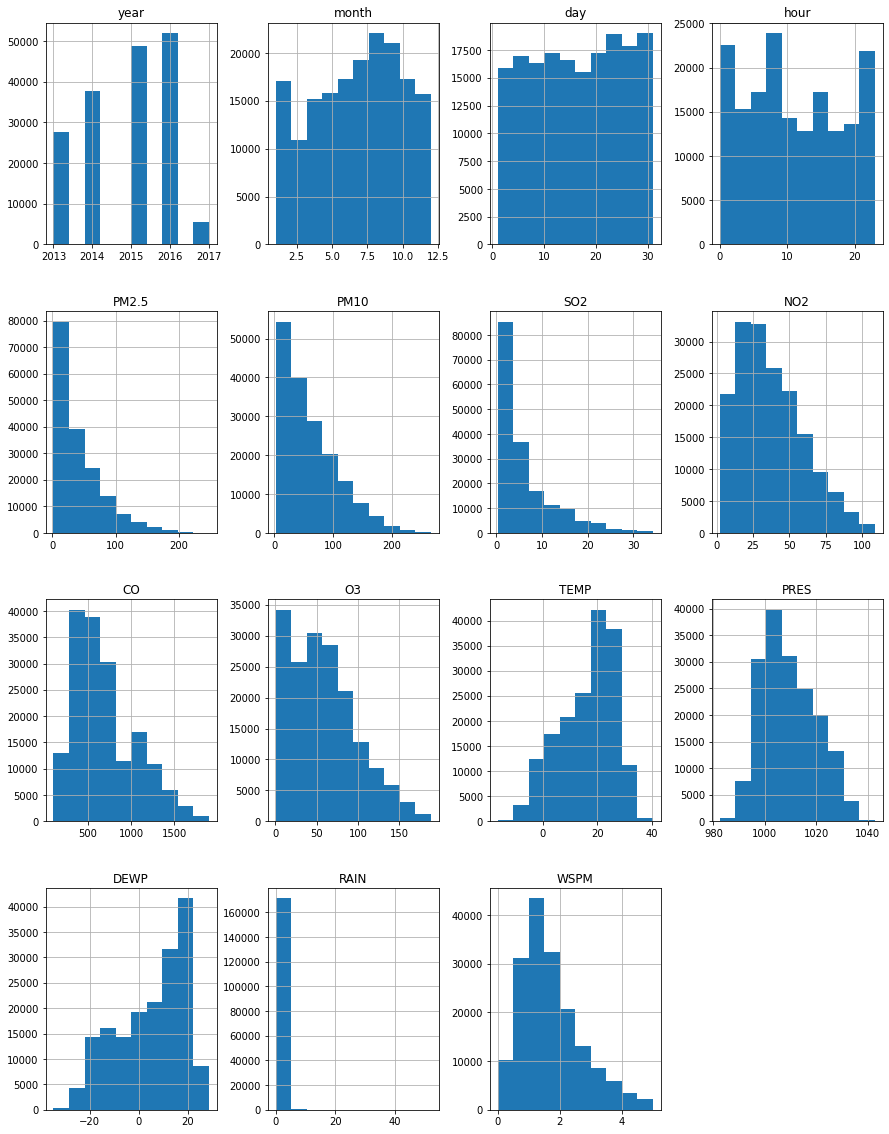

In [14]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Zobrazíme si histogram hodnôt, aby sme vedeli odhadnúť o aké rozdelenie sa približne jedná.

<AxesSubplot:xlabel='station', ylabel='PM2.5'>

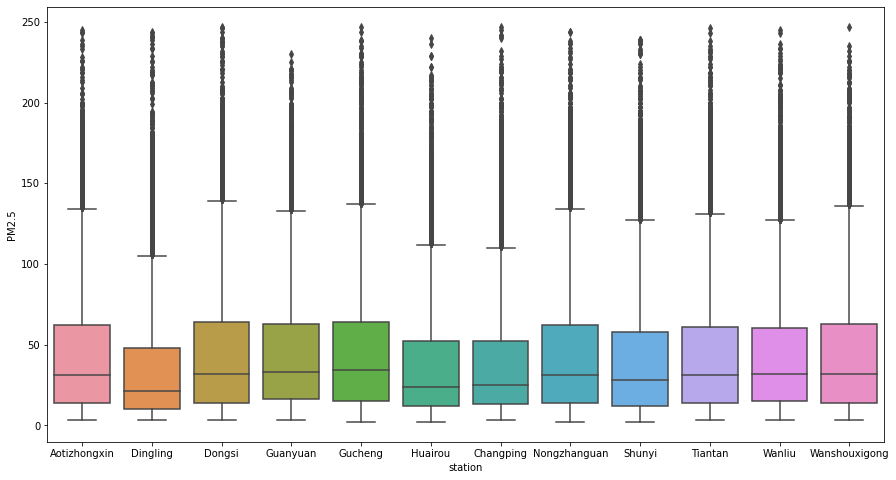

In [9]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='station', y='PM2.5', data=df)

<AxesSubplot:xlabel='station', ylabel='PM10'>

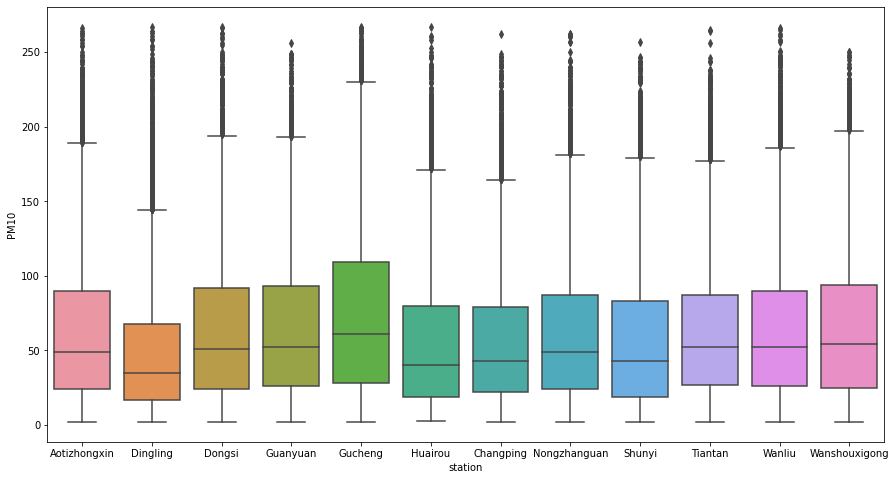

In [119]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='station', y='PM10', data=df)

<AxesSubplot:xlabel='station', ylabel='SO2'>

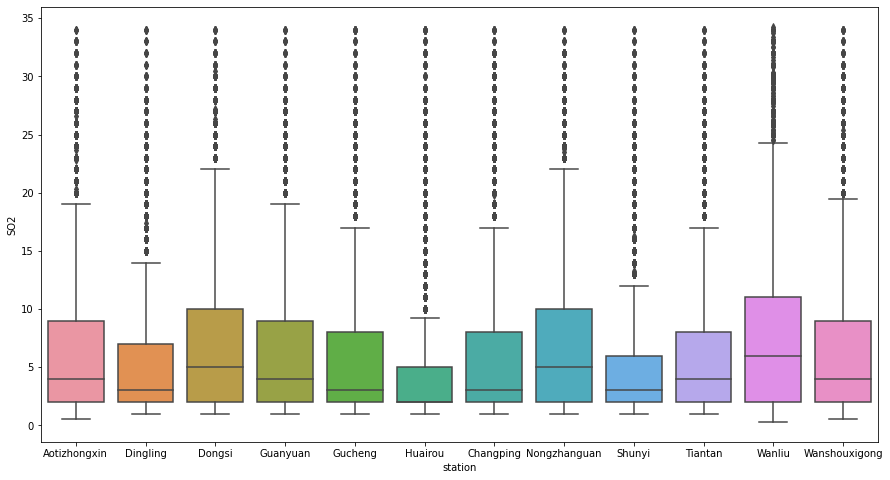

In [120]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='station', y='SO2', data=df)

<AxesSubplot:xlabel='station', ylabel='NO2'>

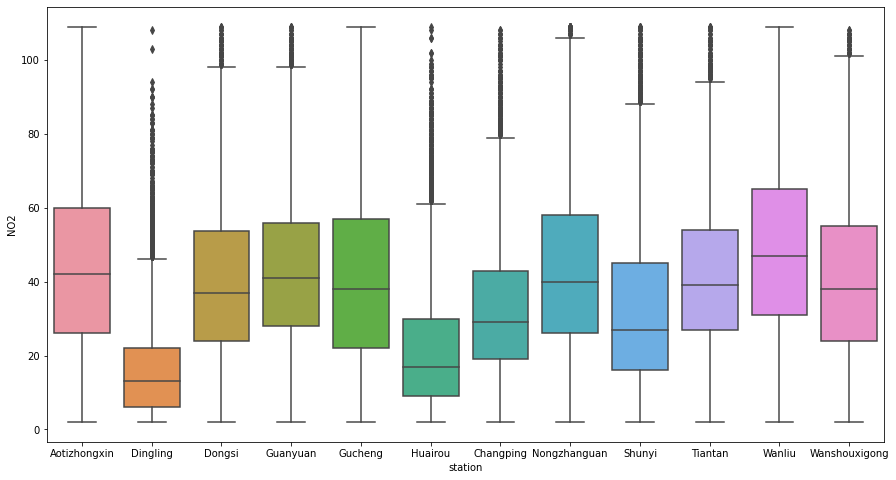

In [121]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='station', y='NO2', data=df)

<AxesSubplot:xlabel='station', ylabel='CO'>

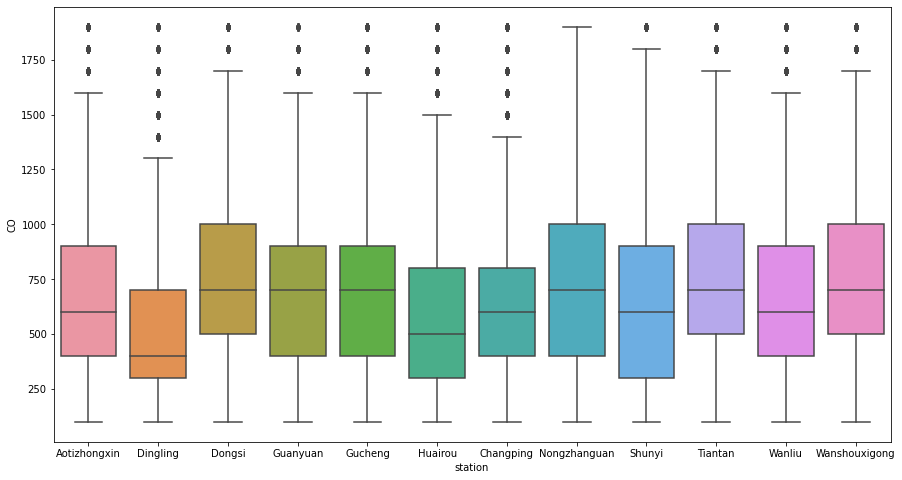

In [122]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='station', y='CO', data=df)

<AxesSubplot:xlabel='station', ylabel='O3'>

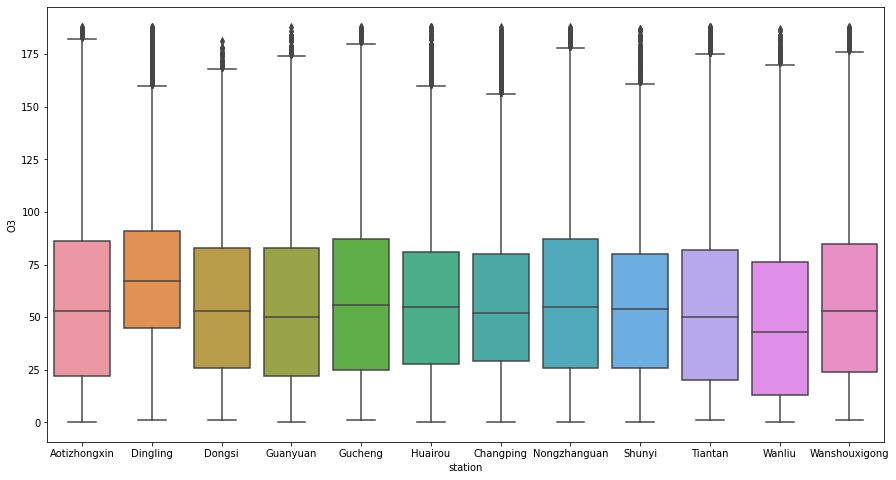

In [123]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='station', y='O3', data=df)

Zobrazenie boxplotov pre jednotlivé mestá v závislosti od konkrétnej látky.

In [132]:
def prepareForPointPlot(name, groupBy):
    df_out = df[[name,groupBy,'station']].groupby([groupBy]).median().reset_index().sort_values(by=groupBy,ascending=False)
    df_out['atribute'] = name
    df_out.rename(columns={name: 'values'}, inplace=True)
    return df_out

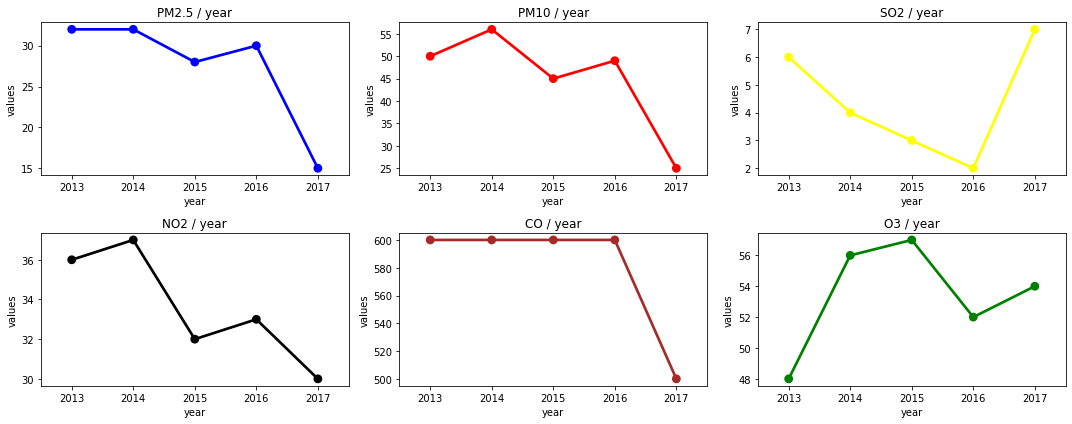

In [143]:
fig,ax=plt.subplots(2, 3, figsize=(15,6))

df_out = prepareForPointPlot('PM2.5', 'year')
ax[0, 0].set_title('PM2.5 / year')
sns.pointplot(ax=ax[0,0],x='year', y='values', data=df_out, color='blue')

df_out = prepareForPointPlot('PM10', 'year')
ax[0, 1].set_title('PM10 / year')
sns.pointplot(ax=ax[0,1],x='year', y='values', data=df_out, color='red')

df_out = prepareForPointPlot('SO2', 'year')
ax[0, 2].set_title('SO2 / year')
sns.pointplot(ax=ax[0,2],x='year', y='values', data=df_out, color='yellow')

df_out = prepareForPointPlot('NO2', 'year')
ax[1, 0].set_title('NO2 / year')
sns.pointplot(ax=ax[1,0],x='year', y='values', data=df_out, color='black')

df_out = prepareForPointPlot('CO', 'year')
ax[1,1].set_title('CO / year')
sns.pointplot(ax=ax[1,1],x='year', y='values', data=df_out, color='brown')

df_out = prepareForPointPlot('O3', 'year')
ax[1, 2].set_title('O3 / year')
sns.pointplot(ax=ax[1,2],x='year', y='values', data=df_out, color='green')

fig.tight_layout()

In [ ]:
Na čiarových grafoch vyššie môžeme vidieť ako sa množstvo jednotlivých látok menilo vo vzduchu v priebehu rokov. 
Vidíme, že väčšina látok nám klesá, s výnimkou SO2, ktorá od roku 2016 do 2017 náramne stúpla a s výnimkou pri O3, ktorá 
do roku 2015 rástla, potom klesla v roku 2016 a nakoniec znova rastie.

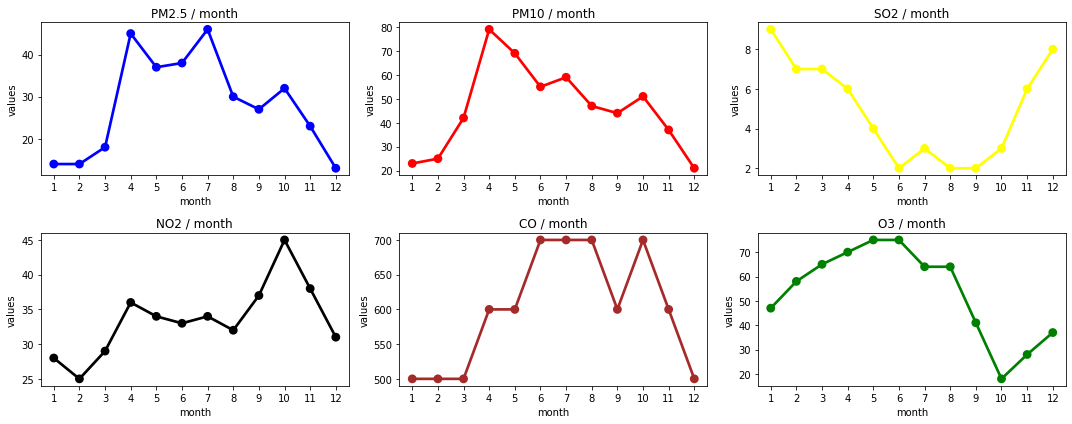

In [144]:
fig,ax=plt.subplots(2, 3, figsize=(15,6))

df_out = prepareForPointPlot('PM2.5', 'month')
ax[0, 0].set_title('PM2.5 / month')
sns.pointplot(ax=ax[0,0],x='month', y='values', data=df_out, color='blue')

df_out = prepareForPointPlot('PM10', 'month')
ax[0, 1].set_title('PM10 / month')
sns.pointplot(ax=ax[0,1],x='month', y='values', data=df_out, color='red')

df_out = prepareForPointPlot('SO2', 'month')
ax[0, 2].set_title('SO2 / month')
sns.pointplot(ax=ax[0,2],x='month', y='values', data=df_out, color='yellow')

df_out = prepareForPointPlot('NO2', 'month')
ax[1, 0].set_title('NO2 / month')
sns.pointplot(ax=ax[1,0],x='month', y='values', data=df_out, color='black')

df_out = prepareForPointPlot('CO', 'month')
ax[1,1].set_title('CO / month')
sns.pointplot(ax=ax[1,1],x='month', y='values', data=df_out, color='brown')

df_out = prepareForPointPlot('O3', 'month')
ax[1, 2].set_title('O3 / month')
sns.pointplot(ax=ax[1,2],x='month', y='values', data=df_out, color='green')

fig.tight_layout()

Na týchto čiarových grafoch vyššie môžeme vidieť závoslosť množstva jednotlivých látok od mesiaca v roku. CO napríklad dosahuje
najvyššie hodnoty počas letných mesiacov. Naopak SO2 má najvyššie hodnoty práve v zime v januári a decembri.

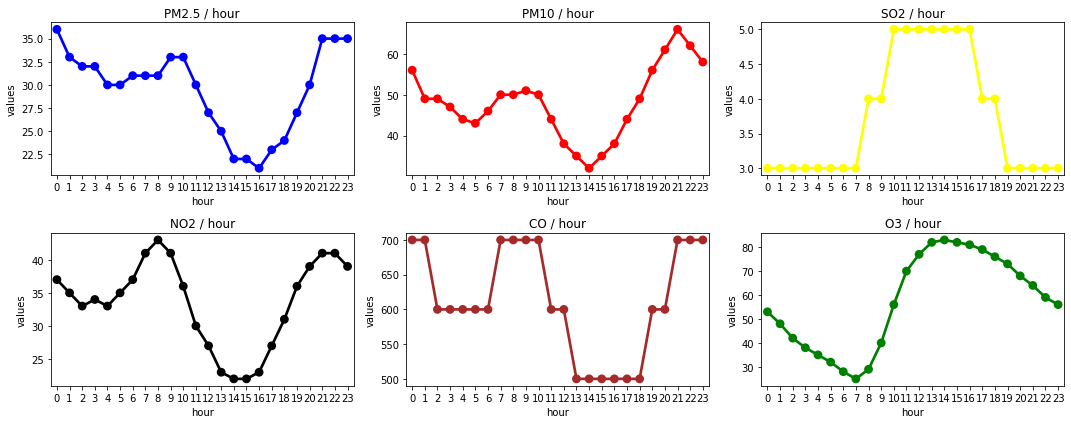

In [146]:
fig,ax=plt.subplots(2, 3, figsize=(15,6))

df_out = prepareForPointPlot('PM2.5', 'hour')
ax[0, 0].set_title('PM2.5 / hour')
sns.pointplot(ax=ax[0,0],x='hour', y='values', data=df_out, color='blue')

df_out = prepareForPointPlot('PM10', 'hour')
ax[0, 1].set_title('PM10 / hour')
sns.pointplot(ax=ax[0,1],x='hour', y='values', data=df_out, color='red')

df_out = prepareForPointPlot('SO2', 'hour')
ax[0, 2].set_title('SO2 / hour')
sns.pointplot(ax=ax[0,2],x='hour', y='values', data=df_out, color='yellow')

df_out = prepareForPointPlot('NO2', 'hour')
ax[1, 0].set_title('NO2 / hour')
sns.pointplot(ax=ax[1,0],x='hour', y='values', data=df_out, color='black')

df_out = prepareForPointPlot('CO', 'hour')
ax[1,1].set_title('CO / hour')
sns.pointplot(ax=ax[1,1],x='hour', y='values', data=df_out, color='brown')

df_out = prepareForPointPlot('O3', 'hour')
ax[1, 2].set_title('O3 / hour')
sns.pointplot(ax=ax[1,2],x='hour', y='values', data=df_out, color='green')

fig.tight_layout()

Tretia séria čiarových grafov nám zobrazuje závislosť jednotlivých látok od hodiny dňa, respektíve ich množstvo v danej hodine dňa. Môčeme si všimnúť, že najviac sa SO2 nachádza vo vzduchu počas dňa, kým je sĺnko na obzore. NO2 naopak práve počas pravdepodobne najväčšej teploty počas dňa klesne a vyššie hodnoty dosahuje tak v noci a nadránom. Podobne ako NO2 sa správa aj PM2.5 a PM10, keď tiež nastane pokles počas poobedných hodín kedy je vo väčšine prípadov dosahované najväčšia denná teplota.

<AxesSubplot:>

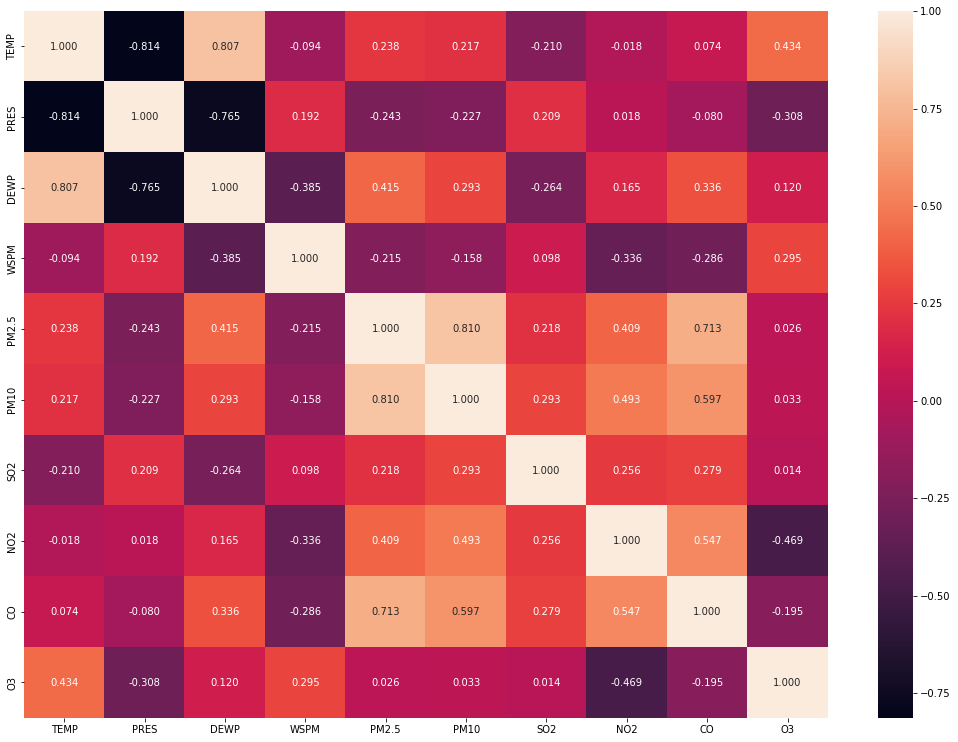

In [147]:
fig, ax = plt.subplots(figsize=(18,13))
sns.heatmap(df[['TEMP', 'PRES', 'DEWP', 'WSPM', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr(), ax=ax, annot=True, fmt=".3f")

Na Heatmape si môžeme všimnúť, ktoré atribúty na seba najviac nadväzujú. Vidíme, že vysoká závislosť je medzi TEMP a DEWP, PM10 a PM2.5, CO a PM2.5. Na tieto atribúty sa teda bližšie pozrieme pri našej ďalšej analýze.

<AxesSubplot:xlabel='CO', ylabel='PM2.5'>

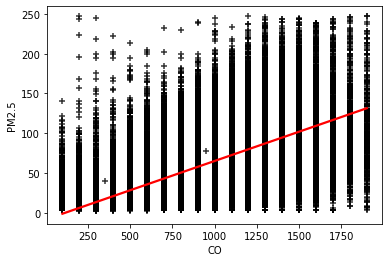

In [158]:
sns.regplot(x="CO", y="PM2.5", data=df, marker='+', scatter_kws={"color": "black"}, line_kws={"color": "red"})

Na zaklade regplotu môžeme vidieť, že atribúty CO a PM2.5 sú od seba lineárne závisle, čo nám už naznačila aj heat mapa.

<AxesSubplot:xlabel='PM10', ylabel='PM2.5'>

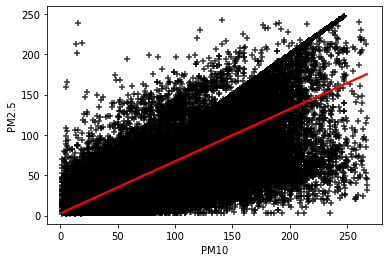

In [160]:
sns.regplot(x="PM10", y="PM2.5", data=df, marker='+', scatter_kws={"color": "black"}, line_kws={"color": "red"})

Na zaklade regplotu môžeme vidieť, že atribúty PM2.5 a PM10 sú od seba lineárne závisle, čo nám už naznačila aj heat mapa.

<AxesSubplot:xlabel='TEMP', ylabel='DEWP'>

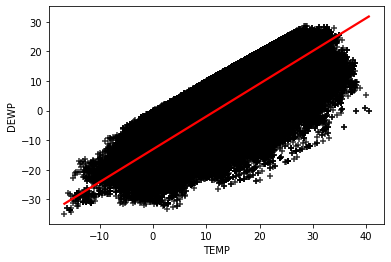

In [19]:
sns.regplot(x="TEMP", y="DEWP", data=df, marker='+', scatter_kws={"color": "black"}, line_kws={"color": "red"})

Podobne ako PM2.5 a PM10 môžeme vidieť na regplote, že TEMP a DEWP sú od seba lineárne závisle, čo nám už naznačila aj heat mapa.

## 2. krok: modelovanie (max 5 bodov)

In [ ]:
Zatial nic len pripraveny kokod

In [ ]:
encoder = CustomEncoderTransformer(df_orig.columns, categorical_cols)
outlier = CustomOutlierTransformer(df_orig.columns, numerical_cols, "drop")
minmax = CustomMinMaxTransformer(df_orig.columns, for_scaling_cols, "scaler")
nulls = CustomNullValuesTransformer(df_orig.columns, "drop")
split = InputAndOutputTransformer(df_orig.columns, feature_cols, output_cols)
selector = CustomAtributeSelectionTransformer(df_orig.columns, 5)


In [64]:
import warnings
warnings.filterwarnings('ignore')

df_train, df_test = train_test_split(df, test_size=0.15)


X_train, y_train  = split.transform(df_train)
X_test, y_test = split.transform(df_test)

X_train, y_train  = selector.transform(X_train, y_train)
X_test, y_test  = selector.transform(X_test, y_test)
